In [1]:
import os
os.getcwd()
os.chdir('C:/Users/William/patternflow1/PatternFlow/recognition/Q8 Autoencoder-OASIS/')
import modules
from modules import VQVAE1
from dataset import DataProcess
#TRAINDATA,VALIDDATA,TESTDATA=DataProcess()


0


c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


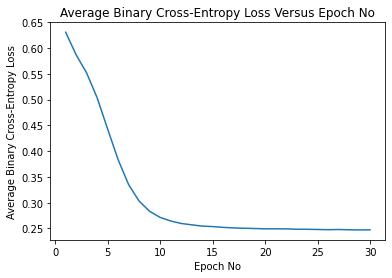

In [4]:
in1=VQVAE1(TRAINDATA)

In [2]:
TRAINDATA,VALIDDATA,TESTDATA=DataProcess()
TRAINDATA=TRAINDATA.permute(0, 3, 2, 1).contiguous()
VALIDDATA=VALIDDATA.permute(0, 3, 2, 1).contiguous()

In [3]:
TESTDATA=TESTDATA.permute(0,3,2,1).contiguous()

In [5]:
from torchmetrics import StructuralSimilarityIndexMeasure
import numpy as np
import torch
predict=np.empty((len(VALIDDATA),VALIDDATA.shape[1],VALIDDATA.shape[2],VALIDDATA.shape[3]))
for i in range(0,len(VALIDDATA)):
 predict[i,:]=in1(VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2])))[0].cpu().detach().numpy()
#metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='elementwise_mean')
#ssim=np.empty((len(VALIDDATA)))

#ssim=metric(torch.tensor(np.float32(predict)),VALIDDATA.to(torch.float32))
    


c:\Users\William\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [6]:
from torchmetrics import StructuralSimilarityIndexMeasure
import numpy as np
import torch
predict1=np.empty((len(TESTDATA),TESTDATA.shape[1],TESTDATA.shape[2],TESTDATA.shape[3]))
for i in range(0,len(TESTDATA)):
 predict1[i,:]=in1(TESTDATA[i].cuda().float().reshape((1,TESTDATA[i].shape[0],TESTDATA[i].shape[1],TESTDATA[i].shape[2])))[0].cpu().detach().numpy()

In [7]:

metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim=0
for i in range(0,112):
 ssim=metric(torch.tensor(np.float32(predict[range(i*10,(i+1)*10),:])),VALIDDATA.to(torch.float32)[range(i*10,(i+1)*10),:])+ssim
SSim=ssim/1120

In [8]:
metric =StructuralSimilarityIndexMeasure(data_range=1.0,reduction='sum')
ssim=0
for i in range(0,int(len(TESTDATA)/4)):
 ssim=metric(torch.tensor(np.float32(predict[range(i*4,(i+1)*4),:])),TESTDATA.to(torch.float32)[range(i*4,(i+1)*4),:])+ssim
SSim1=ssim/len(TESTDATA)

In [9]:
SSim

tensor(0.8487)

In [11]:
SSim1

tensor(0.5747)

In [13]:
#import pickle
with open('goodmodel.pkl', 'wb') as file:
 pickle.dump(in1, file)

In [12]:
import dill as pickle

In [11]:
print(in1)
torch.save(in1,'model.pt')

indeed(
  (layer0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer1): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Conv2d(5, 10, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer3): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer4): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (layer5): BatchNorm2d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer6): Conv2d(5, 3, kernel_size=(3, 3), stride=(1, 1), padding=same)
)


AttributeError: Can't pickle local object 'VQVAE1.<locals>.indeed'

In [31]:
VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2]))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')

In [6]:
in1(VALIDDATA[i].cuda().float().reshape((1,VALIDDATA[i].shape[0],VALIDDATA[i].shape[1],VALIDDATA[i].shape[2])))[0]

tensor([[[[0.2821, 0.2221, 0.2259,  ..., 0.2452, 0.2817, 0.3795],
          [0.2301, 0.1181, 0.1134,  ..., 0.1152, 0.1542, 0.2897],
          [0.1601, 0.0789, 0.0777,  ..., 0.0904, 0.1500, 0.2814],
          ...,
          [0.1835, 0.0954, 0.0919,  ..., 0.0971, 0.1469, 0.2761],
          [0.1815, 0.1024, 0.1051,  ..., 0.1178, 0.1722, 0.2978],
          [0.3079, 0.2173, 0.2004,  ..., 0.2128, 0.2609, 0.3548]],

         [[0.3098, 0.2041, 0.1964,  ..., 0.2075, 0.2211, 0.2881],
          [0.2269, 0.0973, 0.0874,  ..., 0.0898, 0.1152, 0.1870],
          [0.1834, 0.0765, 0.0661,  ..., 0.0758, 0.1057, 0.1749],
          ...,
          [0.1965, 0.0799, 0.0797,  ..., 0.0813, 0.1080, 0.1758],
          [0.1993, 0.0915, 0.0880,  ..., 0.0956, 0.1240, 0.1950],
          [0.2953, 0.1796, 0.1709,  ..., 0.1823, 0.2189, 0.2865]],

         [[0.2742, 0.2163, 0.2232,  ..., 0.2193, 0.2554, 0.3200],
          [0.1499, 0.0813, 0.0764,  ..., 0.0902, 0.1333, 0.2372],
          [0.1446, 0.0712, 0.0625,  ..., 0